In [1]:
import gensim
import chardet
from gensim.models import Word2Vec

In [2]:
try:
    with open('reviews_data.txt', 'r', encoding='utf-8', errors='replace') as file:
        documents = file.readlines()
except FileNotFoundError:
    print("Error")
    raise

doc_tok = [doc.lower().split() for doc in documents]

model = Word2Vec(
    sentences=doc_tok,   # Frases tokenizadas
    vector_size=150,                 # Dimensión de los vectores generados
    window=10,                       # Tamaño de la ventana de contexto
    min_count=2,                     # Frecuencia mínima de las palabras para ser incluidas
    workers=4                        # Número de threads a utilizar
)


In [3]:
# Visualizar las palabras en el vocabulario
vocabulary = list(model.wv.index_to_key)
print("Primeras palabras en el vocabulario:", vocabulary[:10])

# Obtener el vector de una palabra específica 
word = 'hotel'
if word in vocabulary:
    example_word_vector = model.wv[word]
    print(f"Vector para la palabra '{word}':", example_word_vector)
else:
    print(f"Palabra '{word}' no encontrada en el vocabulario")

Primeras palabras en el vocabulario: ['the', 'and', 'a', 'to', 'was', 'in', 'i', 'of', 'we', 'for']
Vector para la palabra 'hotel': [-7.3787880e-01 -3.5064334e-01 -1.7013762e+00  1.6871796e+00
  1.4756159e+00 -1.8055184e+00 -3.8363895e+00 -1.6636770e+00
  4.0606905e-02  5.0897074e-01  7.7158493e-01  1.5281417e+00
  5.0041056e+00  3.0960703e+00 -4.7314209e-01  3.4469767e+00
  9.0108019e-01  2.8474350e+00  6.7680466e-01 -5.0161250e-02
  2.1444287e+00 -3.4431612e+00 -1.0037311e+00  1.9520472e+00
 -8.0359614e-01 -4.7957876e-01 -5.1375771e-01  3.4371729e+00
 -3.5282651e-01 -1.3488742e+00  8.1740960e-02 -1.9336876e+00
  5.4318042e+00  5.0813770e-01 -3.1765690e+00  7.9624152e-01
 -4.0246129e-01 -1.7342465e+00 -5.8409268e-01 -2.5637794e+00
  2.4623249e+00  2.3369284e+00  1.7180599e+00 -1.3875028e-01
  1.3811971e+00  2.0041070e+00 -7.1245110e-01  2.0479081e+00
  7.7345711e-01  2.7035420e+00 -1.4473039e-01  6.9290942e-01
  1.0177861e+00  9.7332329e-02  1.6128115e-01 -7.4204244e-02
  3.0309658e+0

# Encontrar las 10 palabras más similares

In [4]:
palabras_iniciales = ["street", "good", "dog", "mother", "bed"]
palabras_similares = {}

for palabra in palabras_iniciales:
    try:
        similares = model.wv.most_similar(palabra, topn=10)
        palabras_similares[palabra] = [p[0] for p in similares]
        print(f"Palabras similares a '{palabra}': {palabras_similares[palabra], similares}")
    except KeyError:
        print(f"La palabra '{palabra}' no está en el vocabulario del modelo.")



Palabras similares a 'street': (['street,', 'road', 'road,', 'street)', 'street.', 'street).', 'street),', 'street;', 'st,', 'st.,'], [('street,', 0.9443585872650146), ('road', 0.8595727682113647), ('road,', 0.8491561412811279), ('street)', 0.83793705701828), ('street.', 0.8358450531959534), ('street).', 0.8180168271064758), ('street),', 0.7991744875907898), ('street;', 0.7895186543464661), ('st,', 0.7875970602035522), ('st.,', 0.7751910090446472)])
Palabras similares a 'good': (['decent', 'great', 'good,', 'excellent', 'nice', 'good.', 'reasonable', 'terrific', 'fantastic', 'poor'], [('decent', 0.8284637331962585), ('great', 0.8134837746620178), ('good,', 0.7333011031150818), ('excellent', 0.6980715394020081), ('nice', 0.6532346606254578), ('good.', 0.6508363485336304), ('reasonable', 0.6398909687995911), ('terrific', 0.6150302290916443), ('fantastic', 0.5987299680709839), ('poor', 0.5627040863037109)])
Palabras similares a 'dog': (['dogs', 'dog,', 'dog.', 'pet', 'kid', 'dogs,', 'chil

In [5]:
palabras_iniciales = ["street", "good", "dog", "mother", "bed"]
similar_words_dict = {}
palabras = set(palabras_iniciales)

for palabra in palabras_iniciales:
    if palabra in vocabulary:
        similar_words = model.wv.most_similar(palabra, topn=10)
        similar_words_dict[palabra] = similar_words
        palabras.update([w for w, _ in similar_words])
        
embeddings = {}
for palabra in palabras:
    if palabra in vocabulary:
        embeddings[palabra] = model.wv[palabra]

for palabra, vector in embeddings.items():
    print(f"Embedding para la palabra '{palabra}':", vector)

Embedding para la palabra 'dog.': [-0.71836644  0.2526523   0.02699476 -0.06960273 -0.33135924 -0.22865206
 -0.03325255  0.6141835   0.14416859 -0.11789053 -0.33988014  0.05384852
  0.45201284  0.68734854 -1.0944945   0.6344971  -0.0958209   0.299643
  0.01065415  0.09162204 -0.0061438  -0.4517578   0.09655692  1.0009074
 -0.09653616 -0.34573197 -0.20264183 -0.07417577 -0.15375122 -0.4227323
 -0.24372676  0.42842212  0.01954561 -0.11258909 -0.08565729  0.40965238
  0.04875104  0.7045115   0.34173957 -0.05839083 -0.7252804   0.00654013
  0.01796588 -0.4895837  -0.18721513 -0.5177302   0.17949896 -0.44887292
  0.2934258  -0.5408005  -0.4314798   0.7643295   0.11759142 -0.31527436
 -0.565347    0.5542158  -0.3834352  -0.6671985  -0.09154203 -0.7221663
 -0.18236107 -0.77769077  0.06447729  0.16453145  0.646923   -0.12533998
 -0.753259    0.19006626  0.19457622 -0.6238659   0.41977468  0.19764735
  0.02107409  0.19077745  0.5428499  -0.3350751  -0.3542862   0.20061933
 -0.32719108  0.167396

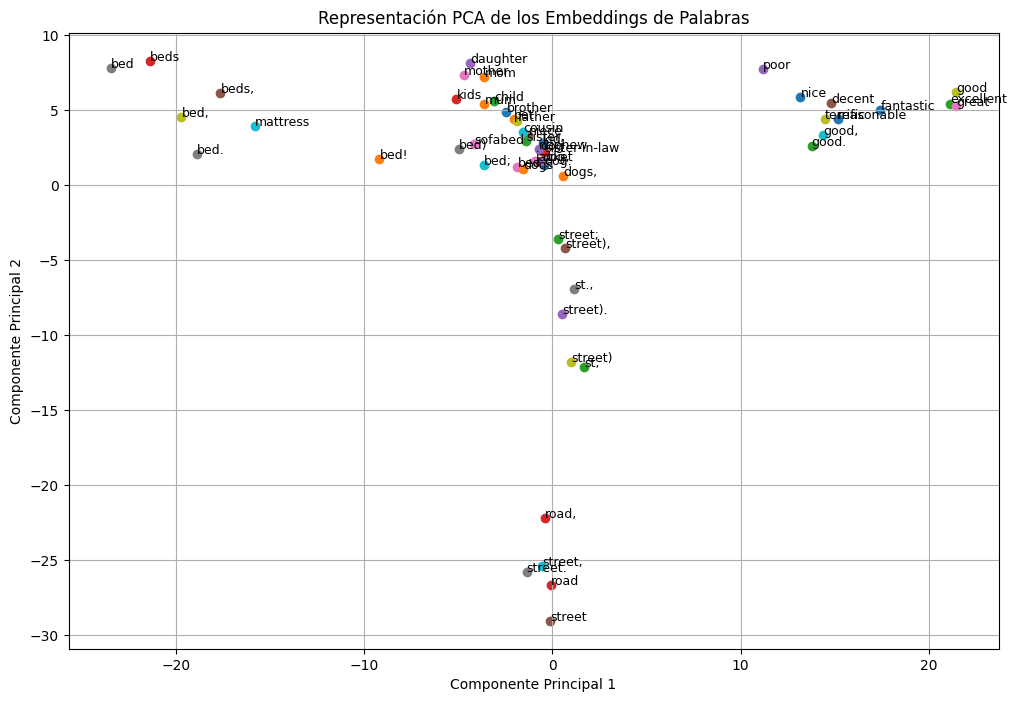

In [6]:
# Aplicar PCA para reducir la dimensionalidad de los embeddings a 2 componentes principales
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

embedding_vectors = list(embeddings.values())
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_vectors)

plt.figure(figsize=(12, 8))
for i, word in enumerate(embeddings.keys()):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.01, reduced_embeddings[i, 1] + 0.01, word, fontsize=9)

plt.title("Representación PCA de los Embeddings de Palabras")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid()
plt.show()